<a href="https://colab.research.google.com/github/jadinsstewart/Cloud-Services/blob/main/NBA_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ella Archie (ejarchie@calpoly.edu)

Jadin Stewart (jsstewar@calpoly.edu)

GSB S521-01

February 26th, 2023

# <center> **Impact of Home Game Attendance on Home Game Outcomes in the NBA** <center/>

In [ ]:
import pandas as pd  
import json 
from urllib.request import urlopen 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

# Introduction

All athletes and sports enthusiasts are familiar with the concept of "Home Court Advantage", and there are a myriad of factors that contribute to this phenomena. There is a known disparity between the amount of wins at home versus on the road, which can be partially accounted for by home teams being familiar with the court, not having to travel, the psychological advantage, and referee bias, but what about the impact of fan presence? We're interested in seeing if there is any correlation between fan attendance and home game wins. We are specifically looking at home game wins because we believe that high fan attendance at home is beneficial to the team as opposed to high fan attendance at away games where the fans will be rooting against the visiting players. For this reason we prioritized home games, under the assumption that most fans in attendance will be there to support the home team.  



#About


We utilized data from the following sources: 

Attendance data from the 2021-2022 season: http://www.espn.com/nba/attendance/_/year/2022

NBA Team Standings from the 2021-2022 season: https://www.covers.com/sport/basketball/nba/standings/2021-2022

# Hypothesis

Our hypothesis is that a greater percent of average home game fan attendance corresponds to greater percentage of home games won. 

# Attendance Data

In [ ]:
attendance = pd.read_html("http://www.espn.com/nba/attendance/_/year/2022", skiprows = 1)

attendance_df = attendance[0]

attendance_df = attendance_df.iloc[1:]

attendance_df = attendance_df.drop(attendance_df.columns[[0,6,7,8,9,10,11]], axis=1)

attendance_df = attendance_df.rename(columns={1: "Team", 2: "Games Played", 3: "Total Attendance", 4: "Average Attendance", 5: "Average Attendance Percent"})


# Standings Data

In [ ]:
standings = pd.read_html("https://www.covers.com/sport/basketball/nba/standings/2021-2022")

standings_df = standings[0]

standings_df = standings_df.drop(standings_df.columns[[5,6,7,8]], axis=1)

standings_df.columns = ("Team", "Wins", "Losses", "Win Percent", "Home Record", "a", "b", "c", "d", "e")

standings_df = standings_df.drop(columns=['a', 'b', 'c', 'd', 'e'])

team_names = {"Boston":"Celtics","Philadelphia":"76ers","Toronto":"Raptors", "Brooklyn":"Nets","New York":"NY Knicks",
              "Milwaukee":"Bucks","Chicago":"Bulls","Cleveland":"Cavaliers","Indiana":"Pacers",
              "Detroit":"Pistons","Miami":"Heat","Atlanta":"Hawks","Charlotte":"Hornets",
              "Washington":"Wizards","Orlando":"Magic","Utah":"Jazz","Denver":"Nuggets","Minnesota":"Timberwolves",
              "Portland":"Trail Blazers","Oklahoma City":"Thunder","Phoenix":"Suns","Golden State":"Warriors",
              "L.A. Clippers": "Clippers", "L.A. Lakers":"Lakers","Sacramento":"Kings","Memphis":"Grizzlies",
              "Dallas":"Mavericks", "New Orleans":"Knicks","San Antonio":"Spurs","Houston":"Rockets"}

standings_df['Team'] = standings_df['Team'].map(team_names)

my_split = standings_df['Home Record'].str.split("-", n = 1, expand = True)

standings_df['Home Wins'] = my_split[0]

standings_df['Home Losses'] = my_split[1]

standings_df['Home Wins'] = pd.to_numeric(standings_df['Home Wins'])

standings_df['Home Losses'] = pd.to_numeric(standings_df['Home Losses'])

standings_df['Total Home Games'] = standings_df['Home Wins'] + standings_df['Home Losses']

standings_df['Home Win Percent'] = (standings_df['Home Wins'] / standings_df['Total Home Games']) * 100

# Data Merge

In [ ]:
# Merging our Data
merged_df = pd.merge(attendance_df, standings_df, on=["Team", "Team"])
     
merged_df = merged_df[['Team','Average Attendance Percent', 'Home Win Percent']]

merged_df

,Team,Average Attendance Percent,Home Win Percent
0,Bulls,99.8,65.853659
1,76ers,98.4,58.536585
2,Mavericks,102.8,70.731707
3,Heat,100.1,70.731707
4,Celtics,100.0,68.292683
5,Raptors,95.3,58.536585
6,Lakers,97.8,51.219512
7,NY Knicks,94.0,41.463415
8,Cavaliers,95.2,60.975610
9,Jazz,100.0,70.731707


In [ ]:
# checking the types 
merged_df.dtypes

Team                           object
Average Attendance Percent     object
Home Win Percent              float64
dtype: object

In [ ]:
# converting 'Average Attendance Percent' into numeric 
merged_df["Average Attendance Percent"] = pd.to_numeric(merged_df["Average Attendance Percent"])

#Exploring the Data

In [ ]:
# Average Attendance Percent Descending 

df_descending = merged_df.sort_values("Average Attendance Percent",ascending=False)

desc = df_descending[["Team","Average Attendance Percent", "Home Win Percent"]]

# top 10 teams
print(desc.head(10))

         Team  Average Attendance Percent  Home Win Percent
2   Mavericks                       102.8         70.731707
11      Bucks                       100.6         65.853659
3        Heat                       100.1         70.731707
4     Celtics                       100.0         68.292683
9        Jazz                       100.0         70.731707
10   Warriors                       100.0         75.609756
0       Bulls                        99.8         65.853659
1       76ers                        98.4         58.536585
12       Nets                        97.9         48.780488
6      Lakers                        97.8         51.219512


In [ ]:
# Average Attendance Percent Ascending

df_ascending = merged_df.sort_values("Average Attendance Percent", ascending = True)

asc = df_ascending[["Team","Average Attendance Percent", "Home Win Percent"]]

# bottom 10 teams 
print(asc.head(10))

            Team  Average Attendance Percent  Home Win Percent
23       Wizards                        75.4         51.219512
19       Pistons                        79.6         31.707317
28        Pacers                        80.1         39.024390
24         Magic                        80.6         29.268293
26       Thunder                        81.7         29.268293
25         Spurs                        81.8         39.024390
27         Kings                        82.1         39.024390
20  Timberwolves                        84.5         63.414634
21     Grizzlies                        85.7         73.170732
22       Rockets                        86.3         26.829268


In [ ]:
# arranged by Home Win Percent Descending

df_descending = merged_df.sort_values("Home Win Percent",ascending=False)

desc = df_descending[["Team","Home Win Percent", "Average Attendance Percent"]]

# top 10 
print(desc.head(10))


         Team  Home Win Percent  Average Attendance Percent
17       Suns         78.048780                        91.8
10   Warriors         75.609756                       100.0
21  Grizzlies         73.170732                        85.7
2   Mavericks         70.731707                       102.8
3        Heat         70.731707                       100.1
9        Jazz         70.731707                       100.0
4     Celtics         68.292683                       100.0
0       Bulls         65.853659                        99.8
11      Bucks         65.853659                       100.6
18      Hawks         65.853659                        97.2


In [ ]:
# arranged by Home Win Percent Ascending 

df_ascending = merged_df.sort_values("Home Win Percent", ascending = True)

asc = df_ascending[["Team","Home Win Percent", "Average Attendance Percent"]]

# bottom 10 
print(asc.head(10))

             Team  Home Win Percent  Average Attendance Percent
22        Rockets         26.829268                        86.3
26        Thunder         29.268293                        81.7
24          Magic         29.268293                        80.6
19        Pistons         31.707317                        79.6
28         Pacers         39.024390                        80.1
25          Spurs         39.024390                        81.8
27          Kings         39.024390                        82.1
7       NY Knicks         41.463415                        94.0
13  Trail Blazers         41.463415                        88.5
12           Nets         48.780488                        97.9


#Visualizations


<AxesSubplot:xlabel='Home Win Percent', ylabel='Average Attendance Percent'>

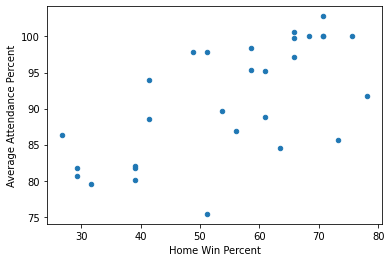

In [ ]:
# scatterplot

merged_df.plot.scatter(x="Home Win Percent", y="Average Attendance Percent")


Visually, there does appear to be some correlation between the Home Win Percentage and the Average Atttendance Percentage. The relationship appears positive with a trend of teams with higher attendance also having higher win percents. 

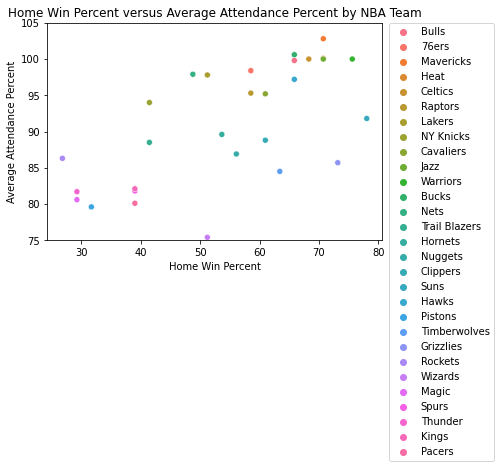

In [ ]:
sns.scatterplot(data = merged_df, x="Home Win Percent", y="Average Attendance Percent", hue= "Team").set(title = "Home Win Percent versus Average Attendance Percent by NBA Team")
plt.ylim(75,105)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#Statistical Analysis

Null: Average attendance percentage has no correlation with home win percentage.

Alternative: Average attendance percentage has a statistically significant correlation with home win percentage.

In [ ]:
x = np.array(merged_df["Average Attendance Percent"]).reshape((-1, 1))
y = np.array(merged_df["Home Win Percent"])

x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     21.36
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           8.41e-05
Time:                        02:05:44   Log-Likelihood:                -111.36
No. Observations:                  29   AIC:                             226.7
Df Residuals:                      27   BIC:                             229.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -59.9057     24.883     -2.407      0.0

Regression Coefficient Test Statistic: 0.272

Regression Coefficient P-Value: 0.000

Conclusion: Reject the null hypothesis. The average home game attendance is statistically significant in predicting home win percent.

#Findings

Overall, we see evidence that average home game attendance is correlated with home win percentage. While our analysis supported our original hypothesis, we are curious in taking this investigation a step further and looking into possible confounding variables. In addition, we also must consider that this data only represents one season so a team that is generally good (high fan attendance) but is struggling in that particular season might still have high fan attendance even if their record sucks.